# Tutorial 2: Part 1

Objectives:

- Quantify the natural chromaticity of our FODO cell.
- First tracking of particles in our FODO cell.

**Natural chromaticity**
<div>
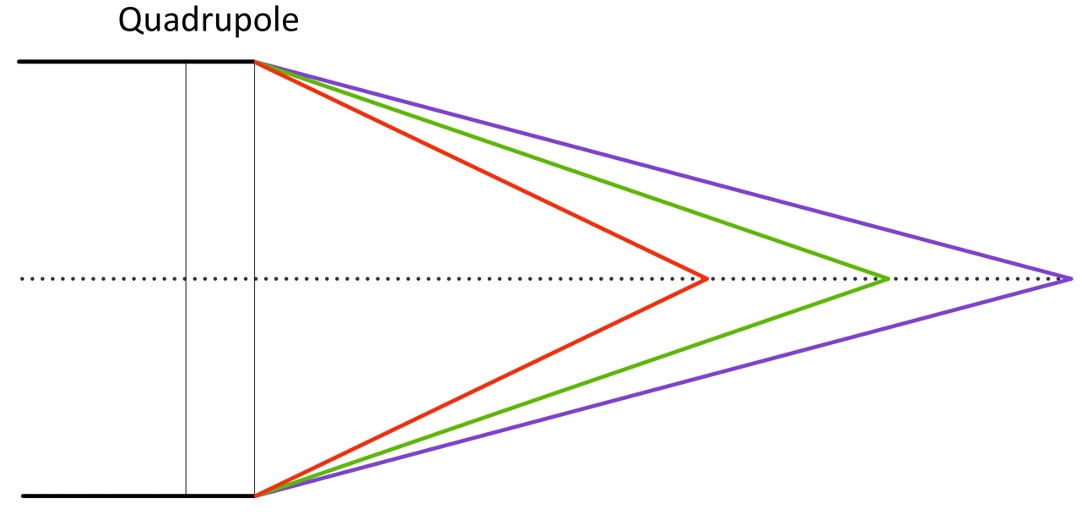
</div>


1. Convert the sequence of Tutorial 1: Part 3 in thin lenses with the following commands:
    
        select, flag=MAKETHIN, SLICE=5;
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;

    Note that this step is required to allow prticle tracking in MAD-X.


2. With a matching block adjust the tunes of the cell to 0.25.


3. Using the chromaticities obtained from the TWISS, compute the tunes for $\Delta p / p = 10^{-3}$.


4. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells. Plot the x-px phase spce. 
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;


5. How does the particle move in the phase space, turn after turn? Do you see the tunes?


6. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 turns. plot the x-px phase-space. Does something change with respect to the previous case? Why?


7. Repeat point 4 adding DELTAP=1e-2 to the track command. How does the phase space look now? is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.


In [254]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from cpymad.madx import Madx 

In [255]:
myMad = Madx(stdout=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.03 18:25:04      +
  ++++++++++++++++++++++++++++++++++++++++++++


1. Convert the sequence of Tutorial 1: Part 3 in thin lenses with the following commands:
    
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;

    Note that this step is required to allow prticle tracking in MAD-X.

In [256]:
myMad = Madx(stdout=True)
myString='''
!! General parameters
Lcell = 100;
nBend=736;

!! Dipole Parameters
Ld = 15;
Ad = 2*pi/nBend;

!! Quadrupole Parameters
K1F = 5e-3;
K1D = -K1F;
Lq =5;

! Magnets properties

QF: QUADRUPOLE, L:=Lq, K1:=K1F;
QD: QUADRUPOLE, L:=Lq, K1:=K1D;
BM: SBEND, L=Ld, angle:=Ad;

!! Sequence difinition
JUAS: SEQUENCE, REFER=center, L=100; !it is important to refer to the the center this time, to make it compatible with the makethin 
qf: QF, at=0+QF->L/2;
b1:  BM, at=10+BM->L/2;
b2:  BM, at=30+BM->L/2;
qd: QD, at=50+QD->L/2;
b3:  BM, at=60+BM->L/2;
b4:  BM, at=80+BM->L/2;
ENDSEQUENCE;

!! Beam definition
beam, particle=proton, energy=7000;

!! Activate sequence
use, sequence=JUAS;

!! TWISS
twiss, table= thick_sequence;

!! MAKETHIN
select, flag=MAKETHIN, SLICE=1;
MAKETHIN, SEQUENCE=JUAS;

!! Activte new sequence
use, sequence=JUAS;

!! TWISS
twiss, table= thin_sequence;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.03 18:25:07      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0007669724505        36.10855572 

                q1                dq1            betxmax              dxmax 
      0.2064690988       -0.240670538        159.7689581        2.989009703 

             dxrms             xcomax             xcorms                 q2 
       2.437158104                  0                  0       0.2063310524 

               dq2            betymax              dymax 

# Comparing the thick and thin sequence.

In [257]:
thinDF=myMad.table['thin_sequence'].dframe()
thinDF[["name", "keyword", "betx","bety","alfx", "alfy", "mux", "muy"]].head()

,name,keyword,betx,bety,alfx,alfy,mux,muy
#s,juas$start:1,marker,156.250598,41.032839,-2.000633,0.560449,0.000000,0.000000
drift_0[0],drift_0:0,drift,166.453864,38.430757,-2.080673,0.480384,0.002467,0.010026
qf,qf:1,multipole,166.453864,38.430757,2.080673,-0.480384,0.002467,0.010026
drift_1[0],drift_1:0,drift,137.044669,47.437966,1.840553,-0.720577,0.010374,0.038128
b1_den,b1_den:1,dipedge,137.044669,47.437966,1.840553,-0.720577,0.010374,0.038128


In [258]:
thickDF=myMad.table['thick_sequence'].dframe()
thickDF[["name", "keyword", "betx","bety","alfx", "alfy", "mux", "muy"]].head()

,name,keyword,betx,bety,alfx,alfy,mux,muy
#s,juas$start:1,marker,159.768958,43.038476,-2.002851,0.591962,0.000000,0.000000
qf,qf:1,quadrupole,159.768958,43.038476,2.002851,-0.591962,0.004878,0.018922
drift_0[0],drift_0:0,drift,140.524610,49.742516,1.846018,-0.748847,0.010190,0.036154
b1,b1:1,sbend,92.193833,79.267739,1.375955,-1.219502,0.031225,0.074545
drift_1[0],drift_1:0,drift,79.218837,92.247180,1.219044,-1.376387,0.040542,0.083856


<IPython.core.display.Javascript object>


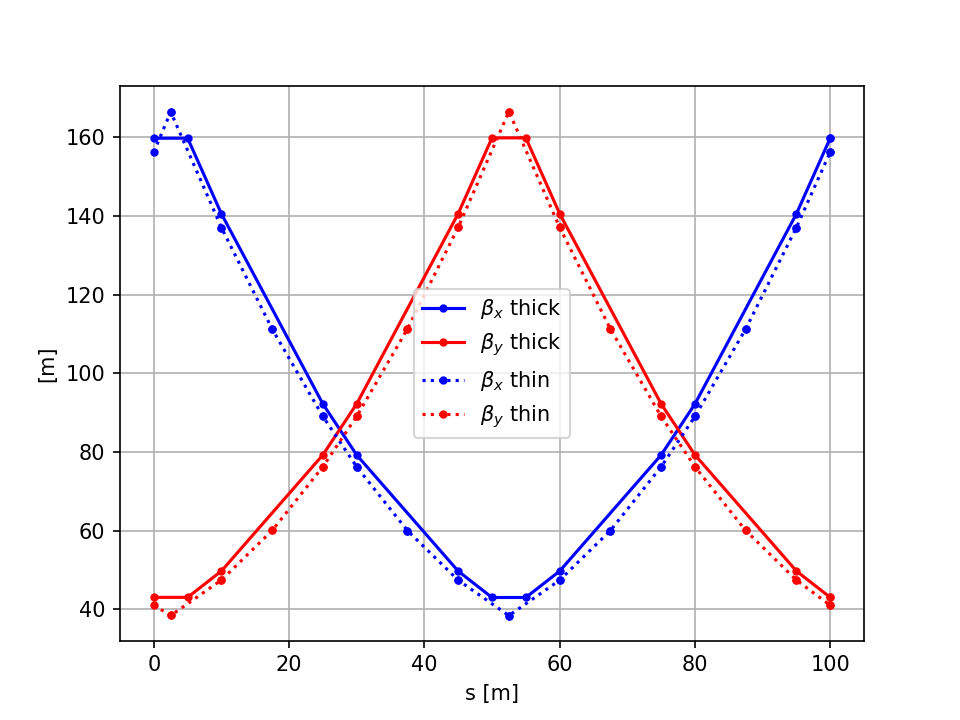

In [259]:
thickDF=myMad.table['thick_sequence'].dframe()
thinDF=myMad.table['thin_sequence'].dframe()

plt.plot(thickDF['s'],thickDF['betx'],'.-b',label='$\\beta_x$ thick')
plt.plot(thickDF['s'],thickDF['bety'],'.-r',label='$\\beta_y$ thick')

plt.plot(thinDF['s'],thinDF['betx'],'.:b',label='$\\beta_x$ thin')
plt.plot(thinDF['s'],thinDF['bety'],'.:r',label='$\\beta_y$ thin')

plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.grid()
plt.legend()

# Matching the tunes

2. With a matching block adjust the tunes of the cell to 0.25.

In [228]:
myString='''

//*************************************************//
!   ACTIVATE THE SEQUENCE
//*************************************************//

use, sequence=JUAS;

//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//

match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.25;
global, Q2=0.25;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;

//*************************************************//
!   TWISS
//*************************************************//

twiss, table=thin_new_wp;
value, beam->beta;
'''
myMad.input(myString);

START MATCHING

number of sequences: 1
sequence name: juas
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.24545932E+00


call:       4   Penalty function =   0.63880401E-03
call:       7   Penalty function =   0.50769271E-08
call:      10   Penalty function =   0.31924340E-18
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.31924340E-18

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     2.50000000E-01     2.50000000E-01     1.59770071E-19
Global constraint:         q2           4     2.50000000E-01     2.50000000E-01     1.59473327E-19


Final Penalty Function =   3.19243398e-19





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------

# Chromaticity
3. Using the chromaticities obtained from the TWISS, compute the tunes for $\Delta p / p = 10^{-3}$.

$\Delta Q = dq* \frac{\Delta p}{p}$


**REMEMBER** That the derivative functions in MAD-X are normalized by the relativistic factor beta.

We could assume ultra-relativistic beam.

In [229]:
beta_rel=myMad.sequence['JUAS'].beam.beta

In [230]:
dq1_ref=myMad.table['summ'].dq1[0]

In [231]:
# Variation on the tune
dq1_ref*beta_rel*1e-3

-0.0003181838661461891

This detuning is quite important.

In [232]:
#Tune of the machine
tune_onmomentum=myMad.table['summ'].q1[0]
print(tune_onmomentum)
tune_offmomentum=myMad.table['summ'].q1[0]-0.00031
print(tune_offmomentum)

0.25000000003997125
0.24969000003997124


# Tracking
4. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 turns. Plot the x-px phase spce. 
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;
        
5. How does the particle move in the phase space, cell after cell? Do you see the tunes?


6. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 cells. Plot the x-px phase-space. does something change with respect to the previous case? Why?       

In [233]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine', DELTAP=0.00;
start, x= 1e-3, px=0, y= 1e-3, py=0;
run,turns=100;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

enter TRACK module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

Full 6D closed orbit search.
Initial value of 6-D closed orbit from Twiss: 
orbit0   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  Singular matrix occurred during closed orbit search.

6D closed orbit found by subroutine trclor 
iteration:   2 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         1        100    0.0009999993875   -1.058506983e-11 

                 y                 py                  t                 pt 
             0.001                  0                  0                  0 
    0.001000000136   -1.059230005e-11   -

In [234]:
particle1=myMad.table['track.obs0001.p0001'].dframe()

In [235]:
particle1

,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.001000,0.000000e+00,0.001000,0.000000e+00,0.000000e+00,0.0,0.0,7000.0
#e,1.0,1.0,-0.002313,-3.996887e-05,0.000514,-3.999232e-05,1.901139e-05,0.0,0.0,7000.0
#e,1.0,2.0,-0.001000,2.117014e-13,-0.001000,2.118460e-13,6.517432e-05,0.0,0.0,7000.0
#e,1.0,3.0,0.002313,3.996887e-05,-0.000514,3.999232e-05,4.593109e-05,0.0,0.0,7000.0
#e,1.0,4.0,0.001000,-4.234028e-13,0.001000,-4.236920e-13,-3.197509e-07,0.0,0.0,7000.0
...,...,...,...,...,...,...,...,...,...,...
#e,1.0,96.0,0.001000,-1.016167e-11,0.001000,-1.016861e-11,-7.674023e-06,0.0,0.0,7000.0
#e,1.0,97.0,-0.002313,-3.996887e-05,0.000514,-3.999232e-05,1.133738e-05,0.0,0.0,7000.0
#e,1.0,98.0,-0.001000,1.037337e-11,-0.001000,1.038045e-11,5.750030e-05,0.0,0.0,7000.0
#e,1.0,99.0,0.002313,3.996887e-05,-0.000514,3.999232e-05,3.825706e-05,0.0,0.0,7000.0


<IPython.core.display.Javascript object>


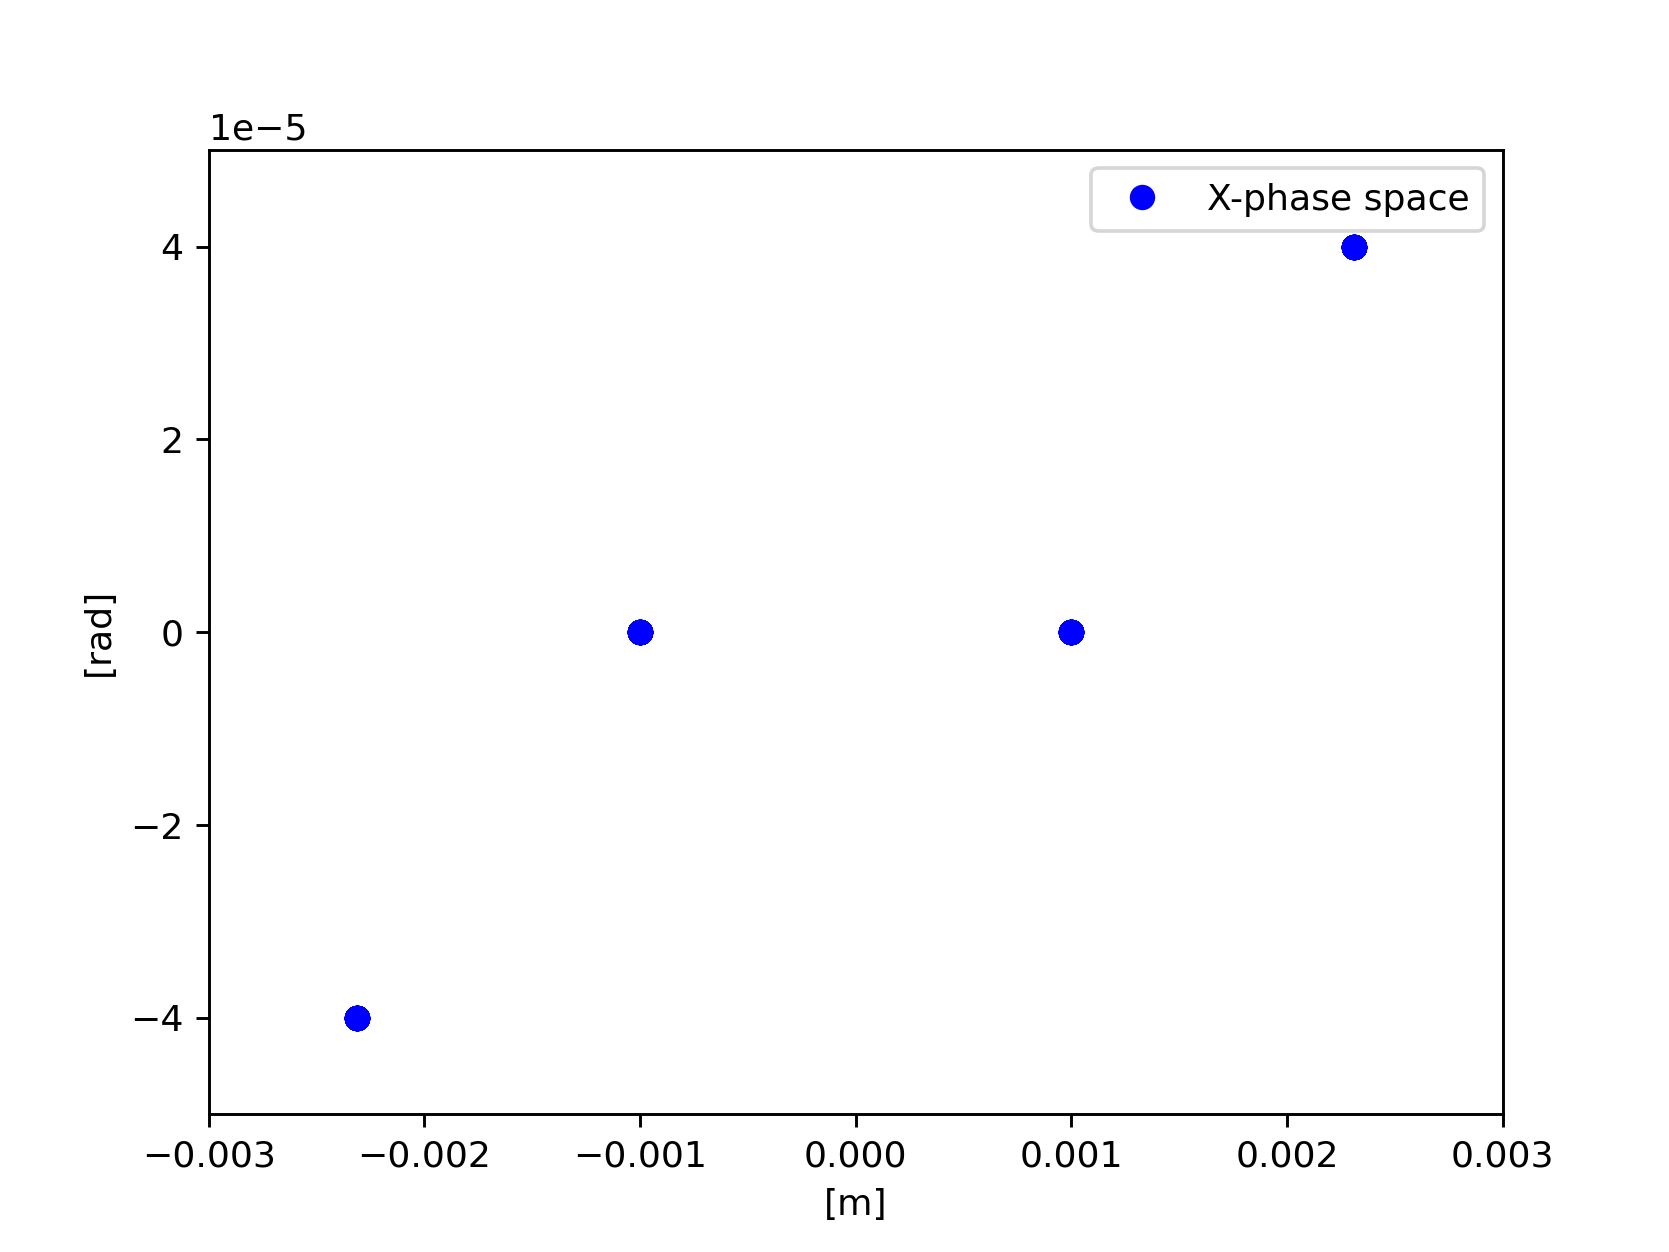

(-5e-05, 5e-05)

In [237]:
%matplotlib notebook
plt.plot(particle1['x'],particle1['px'],'ob',label='X-phase space')
#plt.plot(particle2['x'],particle2['px'],'or',label='X-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
plt.xlim(-0.003,0.003)
plt.ylim(-5e-5, 5e-5)

<IPython.core.display.Javascript object>


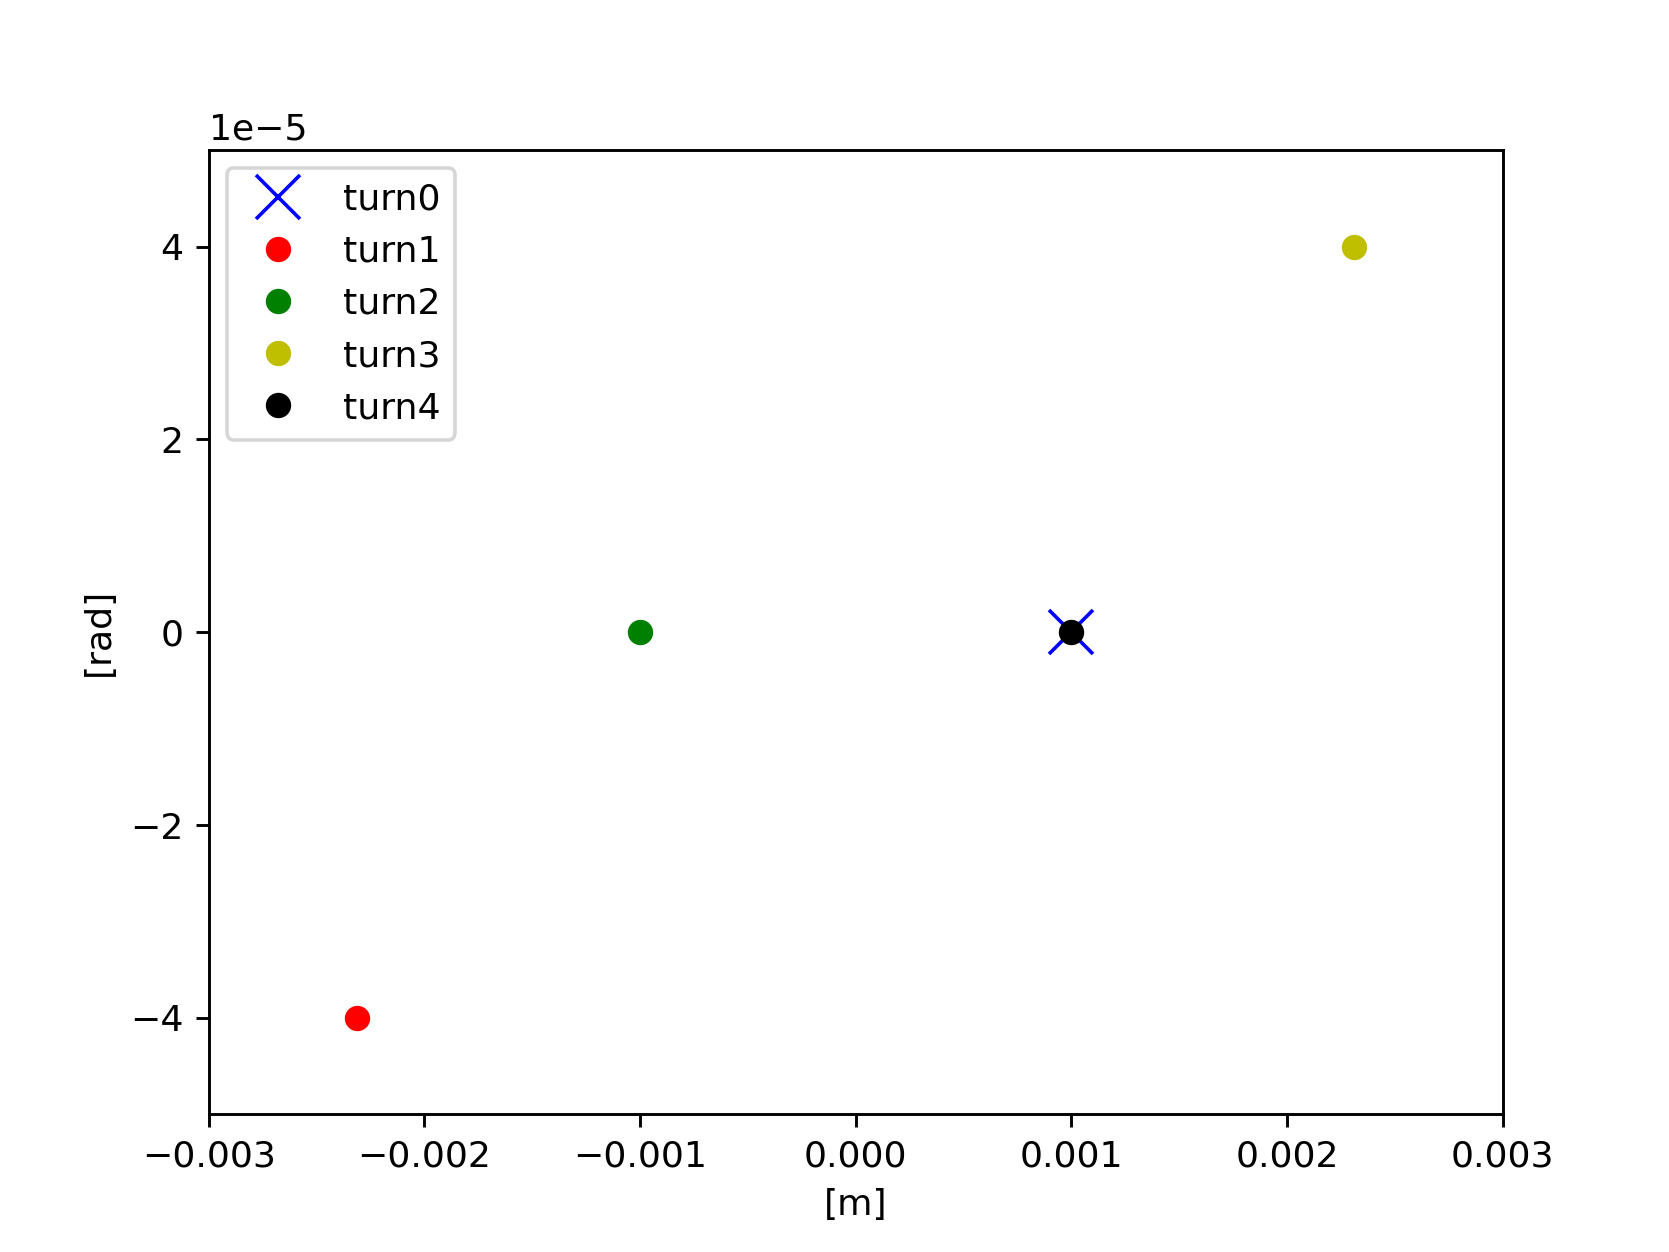

(-5e-05, 5e-05)

In [238]:
%matplotlib notebook
turn0=particle1[particle1["turn"]==0]
turn1=particle1[particle1["turn"]==1]
turn2=particle1[particle1["turn"]==2]
turn3=particle1[particle1["turn"]==3]
turn4=particle1[particle1["turn"]==4]
plt.plot(turn0['x'],turn0['px'],'xb',markersize=12,label='turn0')
plt.plot(turn1['x'],turn1['px'],'or',label='turn1')
plt.plot(turn2['x'],turn2['px'],'og',label='turn2')
plt.plot(turn3['x'],turn3['px'],'oy',label='turn3')
plt.plot(turn4['x'],turn4['px'],'ok',label='turn4')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
plt.xlim(-0.003,0.003)
plt.ylim(-5e-5, 5e-5)

<IPython.core.display.Javascript object>


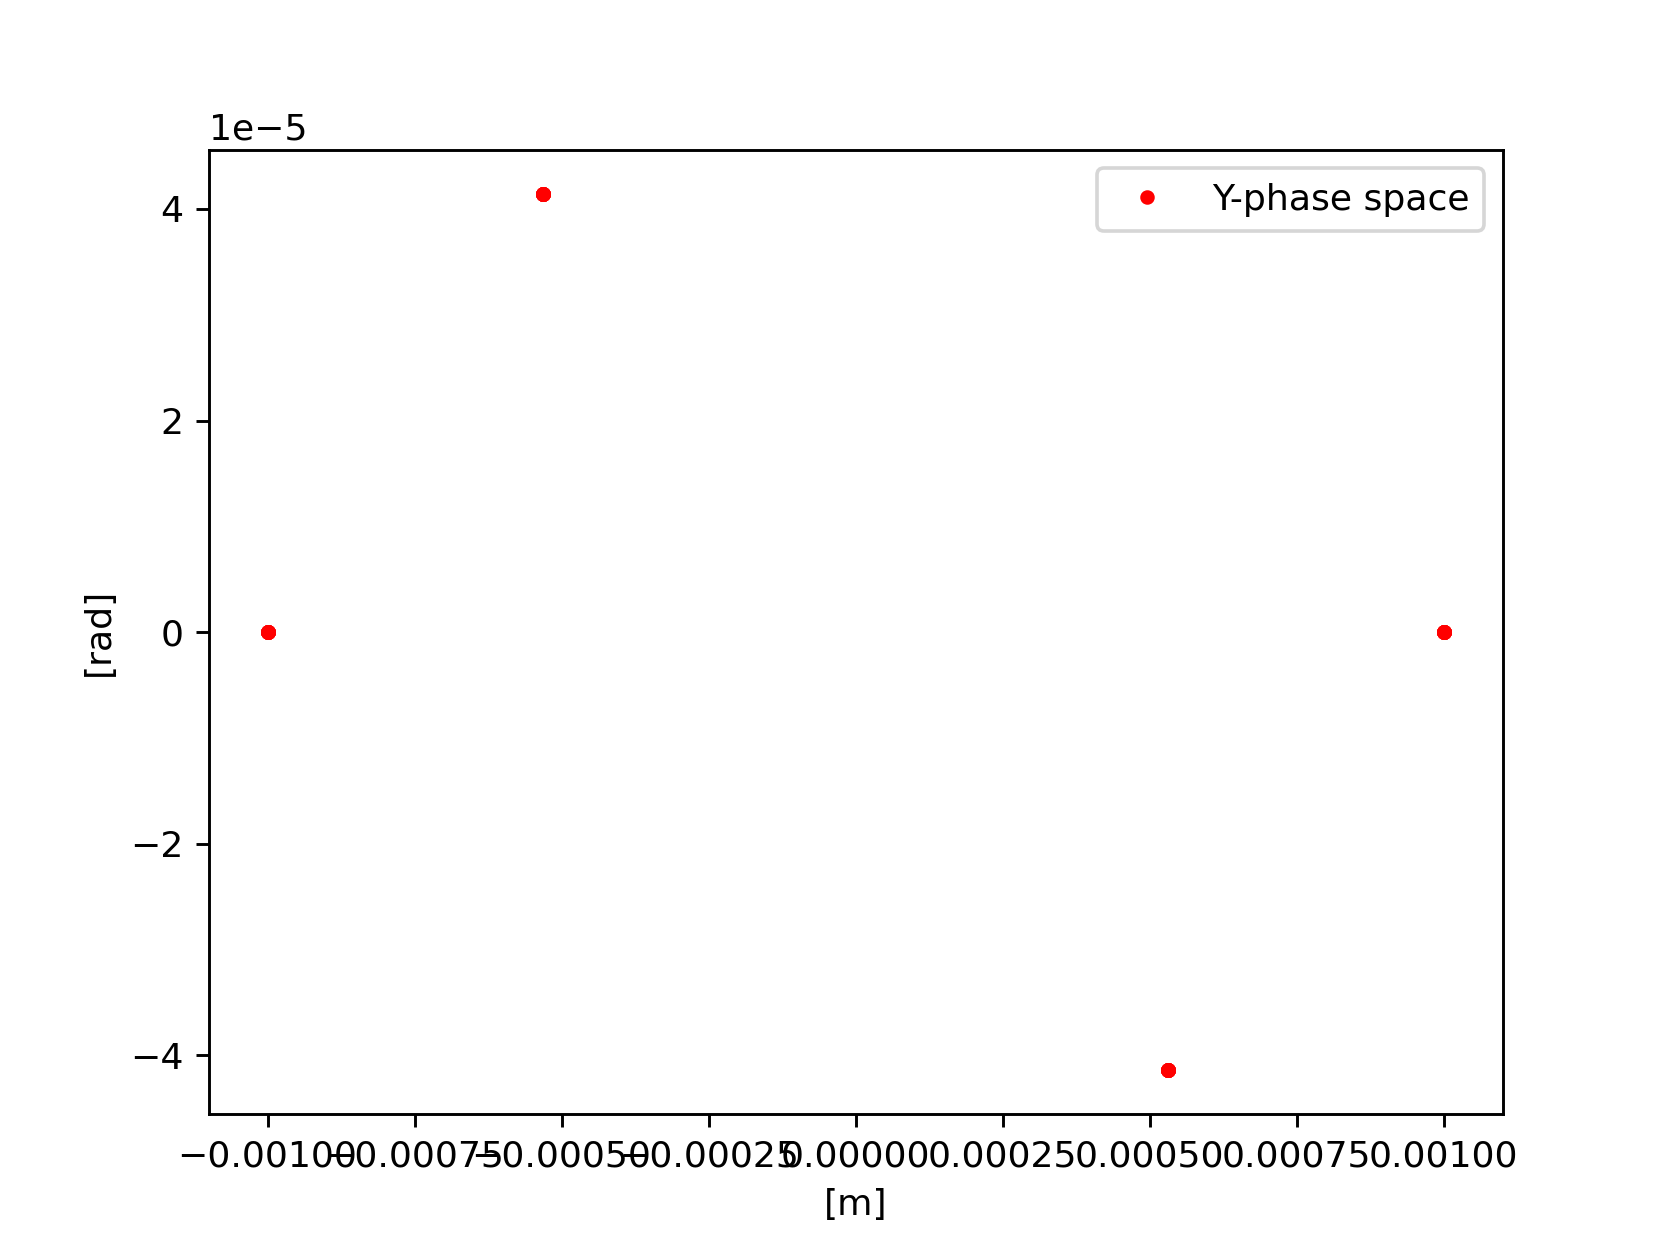

In [239]:
%matplotlib notebook
plt.plot(myParticle['y'],myParticle['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


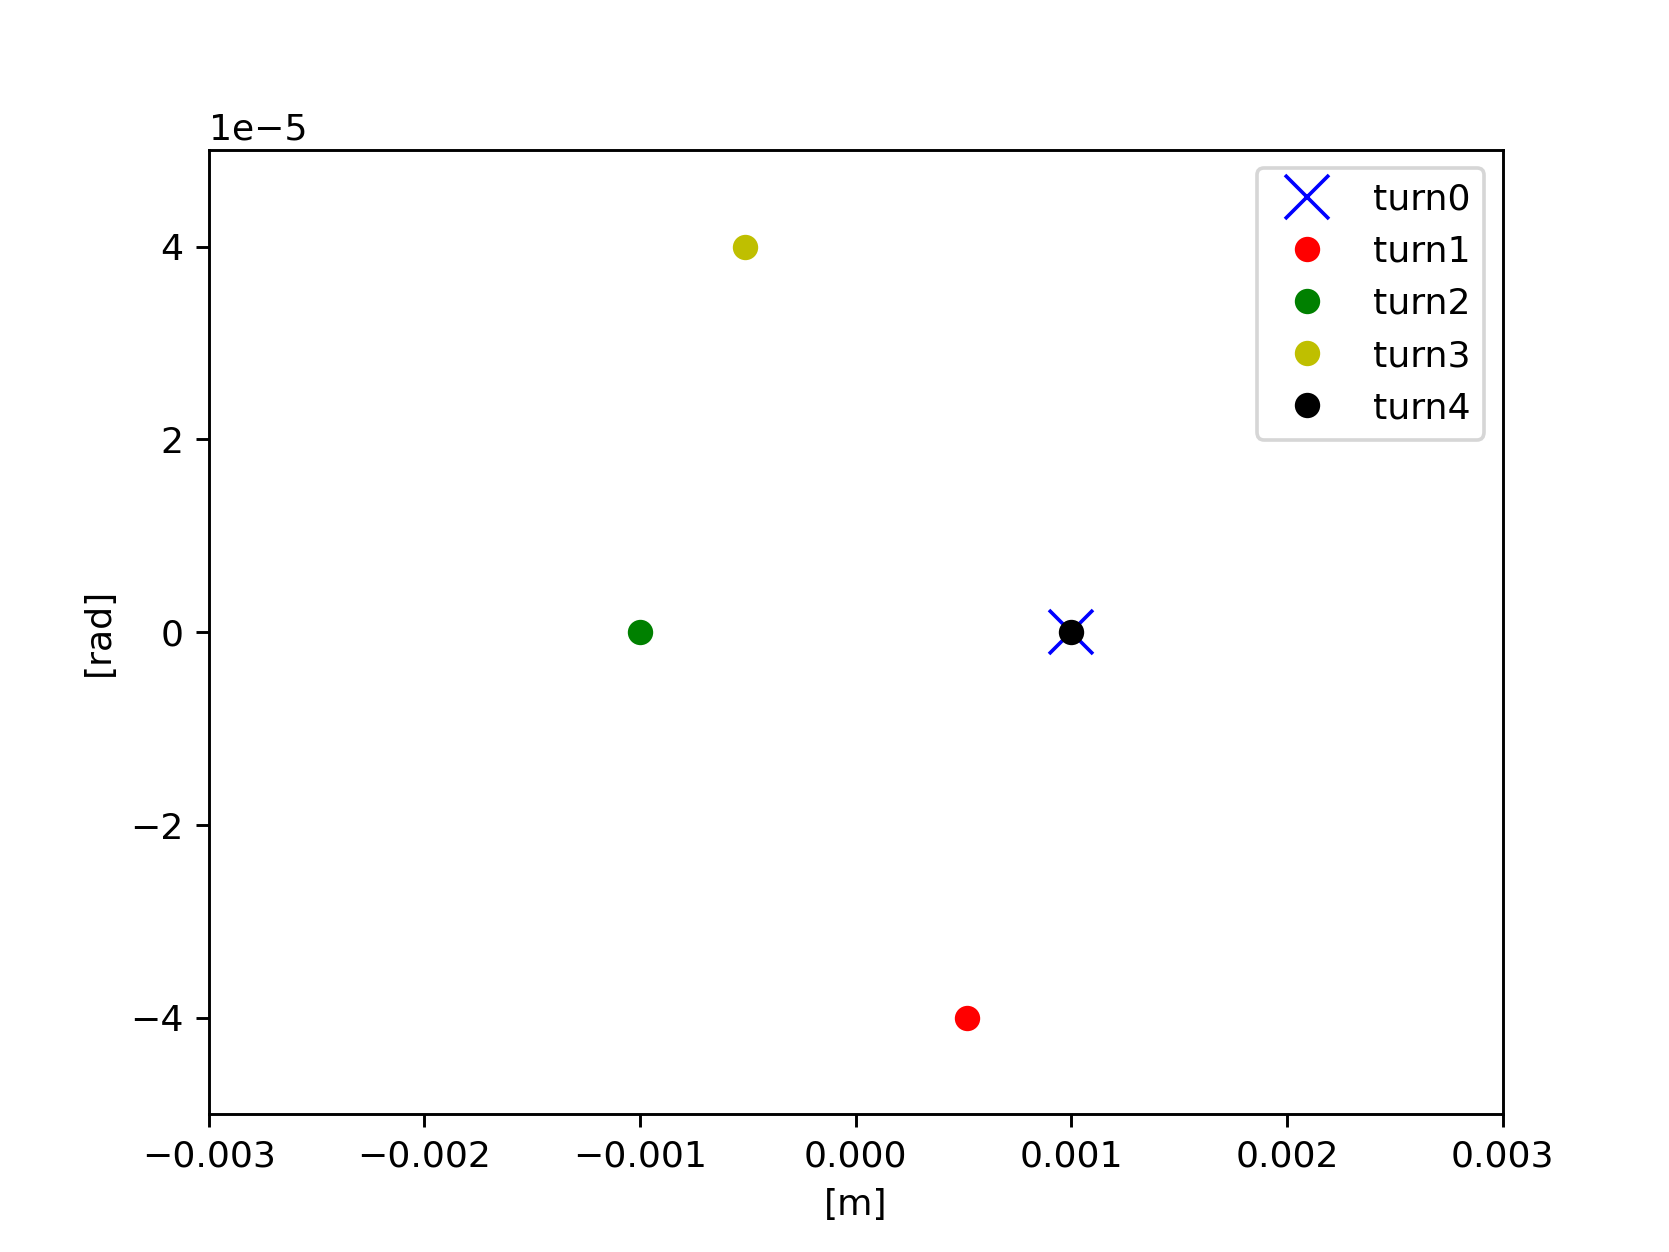

(-5e-05, 5e-05)

In [241]:
%matplotlib notebook
turn0=particle1[particle1["turn"]==0]
turn1=particle1[particle1["turn"]==1]
turn2=particle1[particle1["turn"]==2]
turn3=particle1[particle1["turn"]==3]
turn4=particle1[particle1["turn"]==4]
plt.plot(turn0['y'],turn0['py'],'xb',markersize=12,label='turn0')
plt.plot(turn1['y'],turn1['py'],'or',label='turn1')
plt.plot(turn2['y'],turn2['py'],'og',label='turn2')
plt.plot(turn3['y'],turn3['py'],'oy',label='turn3')
plt.plot(turn4['y'],turn4['py'],'ok',label='turn4')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
plt.xlim(-0.003,0.003)
plt.ylim(-5e-5, 5e-5)

# Traking particles with larger amplitude
6. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 cells. Plot the x-px phase-space. Does something change with respect to the previous case? Why?

In [242]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine', DELTAP=0.00;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

enter TRACK module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

Full 6D closed orbit search.
Initial value of 6-D closed orbit from Twiss: 
orbit0   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  Singular matrix occurred during closed orbit search.

6D closed orbit found by subroutine trclor 
iteration:   2 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0                0.1                  0 
         1        100      0.09944526157   -9.581926562e-06 

                 y                 py                  t                 pt 
               0.1                  0                  0                  0 
      0.1001230044   -9.589510844e-06    

In [243]:
particle2=myMad.table['track.obs0001.p0001'].dframe()

<IPython.core.display.Javascript object>


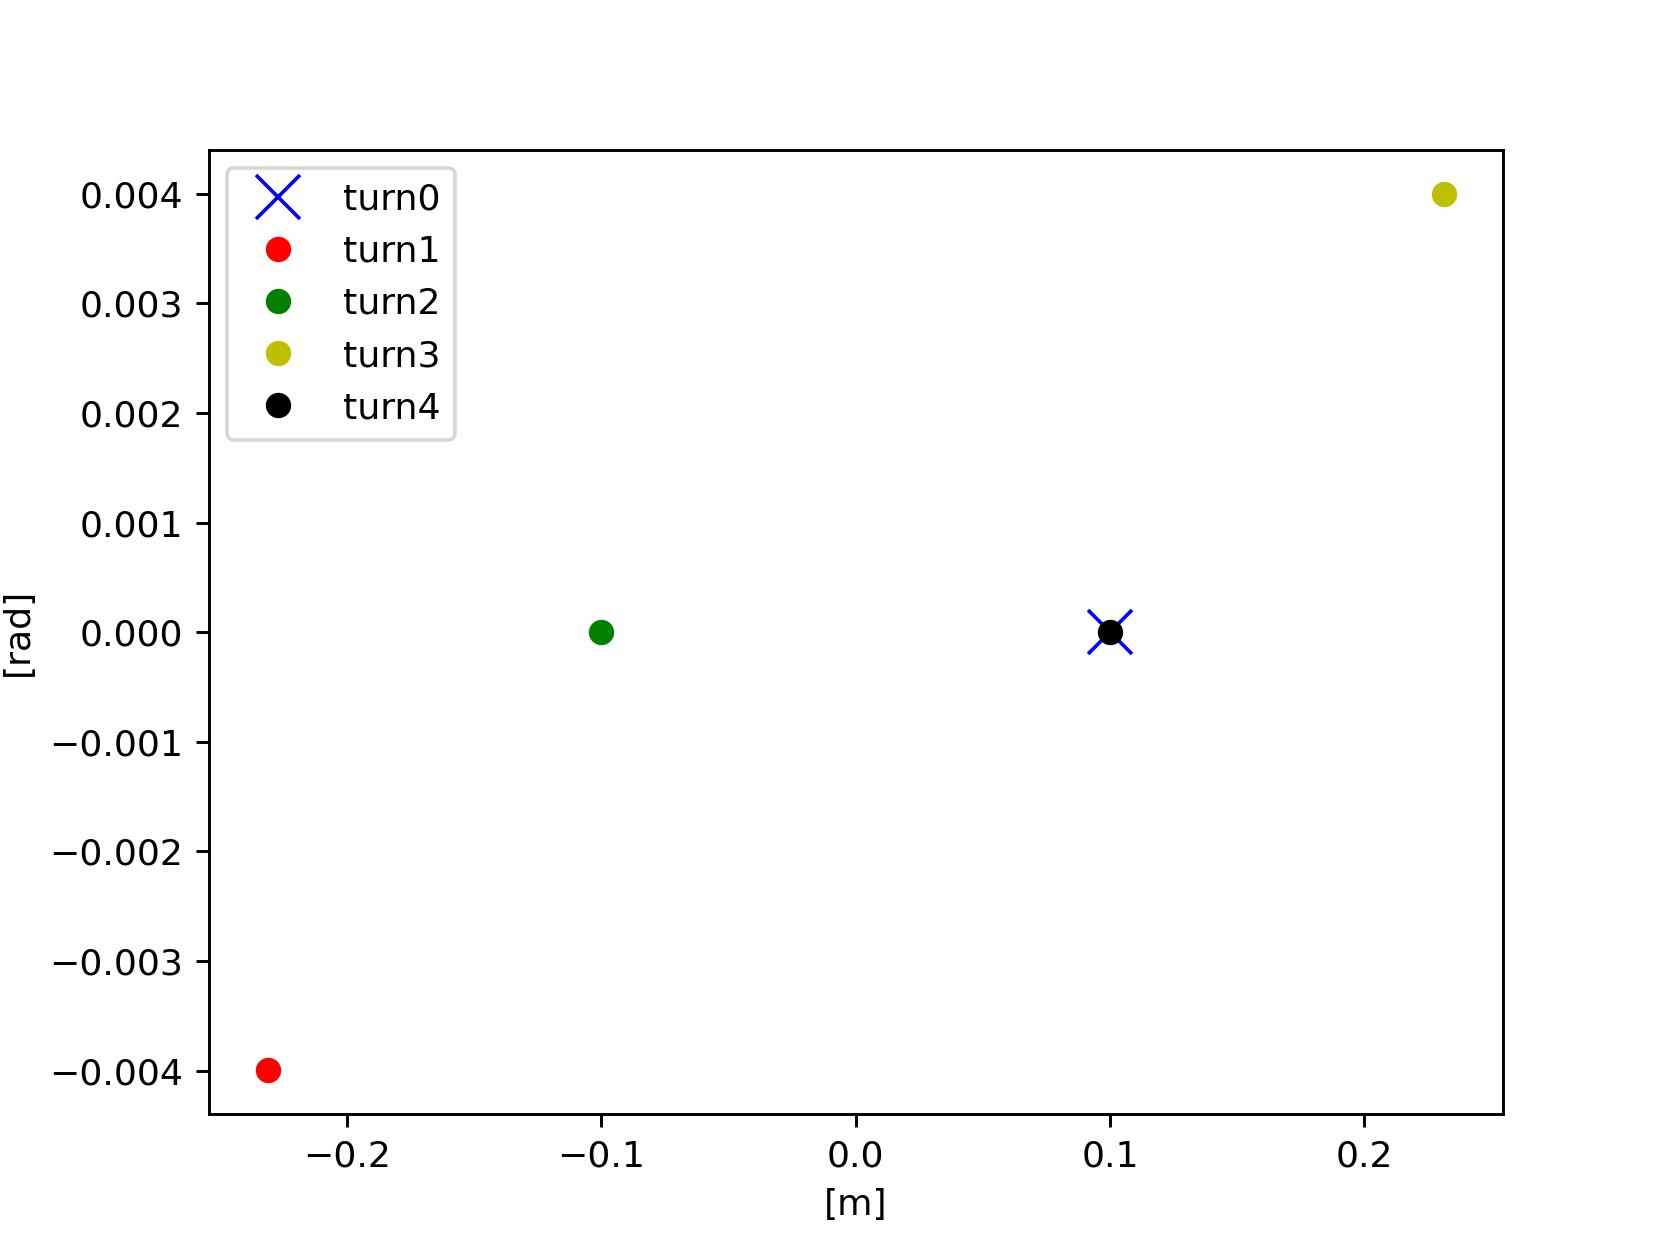

In [244]:
%matplotlib notebook
turn0=particle2[particle1["turn"]==0]
turn1=particle2[particle1["turn"]==1]
turn2=particle2[particle1["turn"]==2]
turn3=particle2[particle1["turn"]==3]
turn4=particle2[particle1["turn"]==4]
plt.plot(turn0['x'],turn0['px'],'xb',markersize=12,label='turn0')
plt.plot(turn1['x'],turn1['px'],'or',label='turn1')
plt.plot(turn2['x'],turn2['px'],'og',label='turn2')
plt.plot(turn3['x'],turn3['px'],'oy',label='turn3')
plt.plot(turn4['x'],turn4['px'],'ok',label='turn4')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


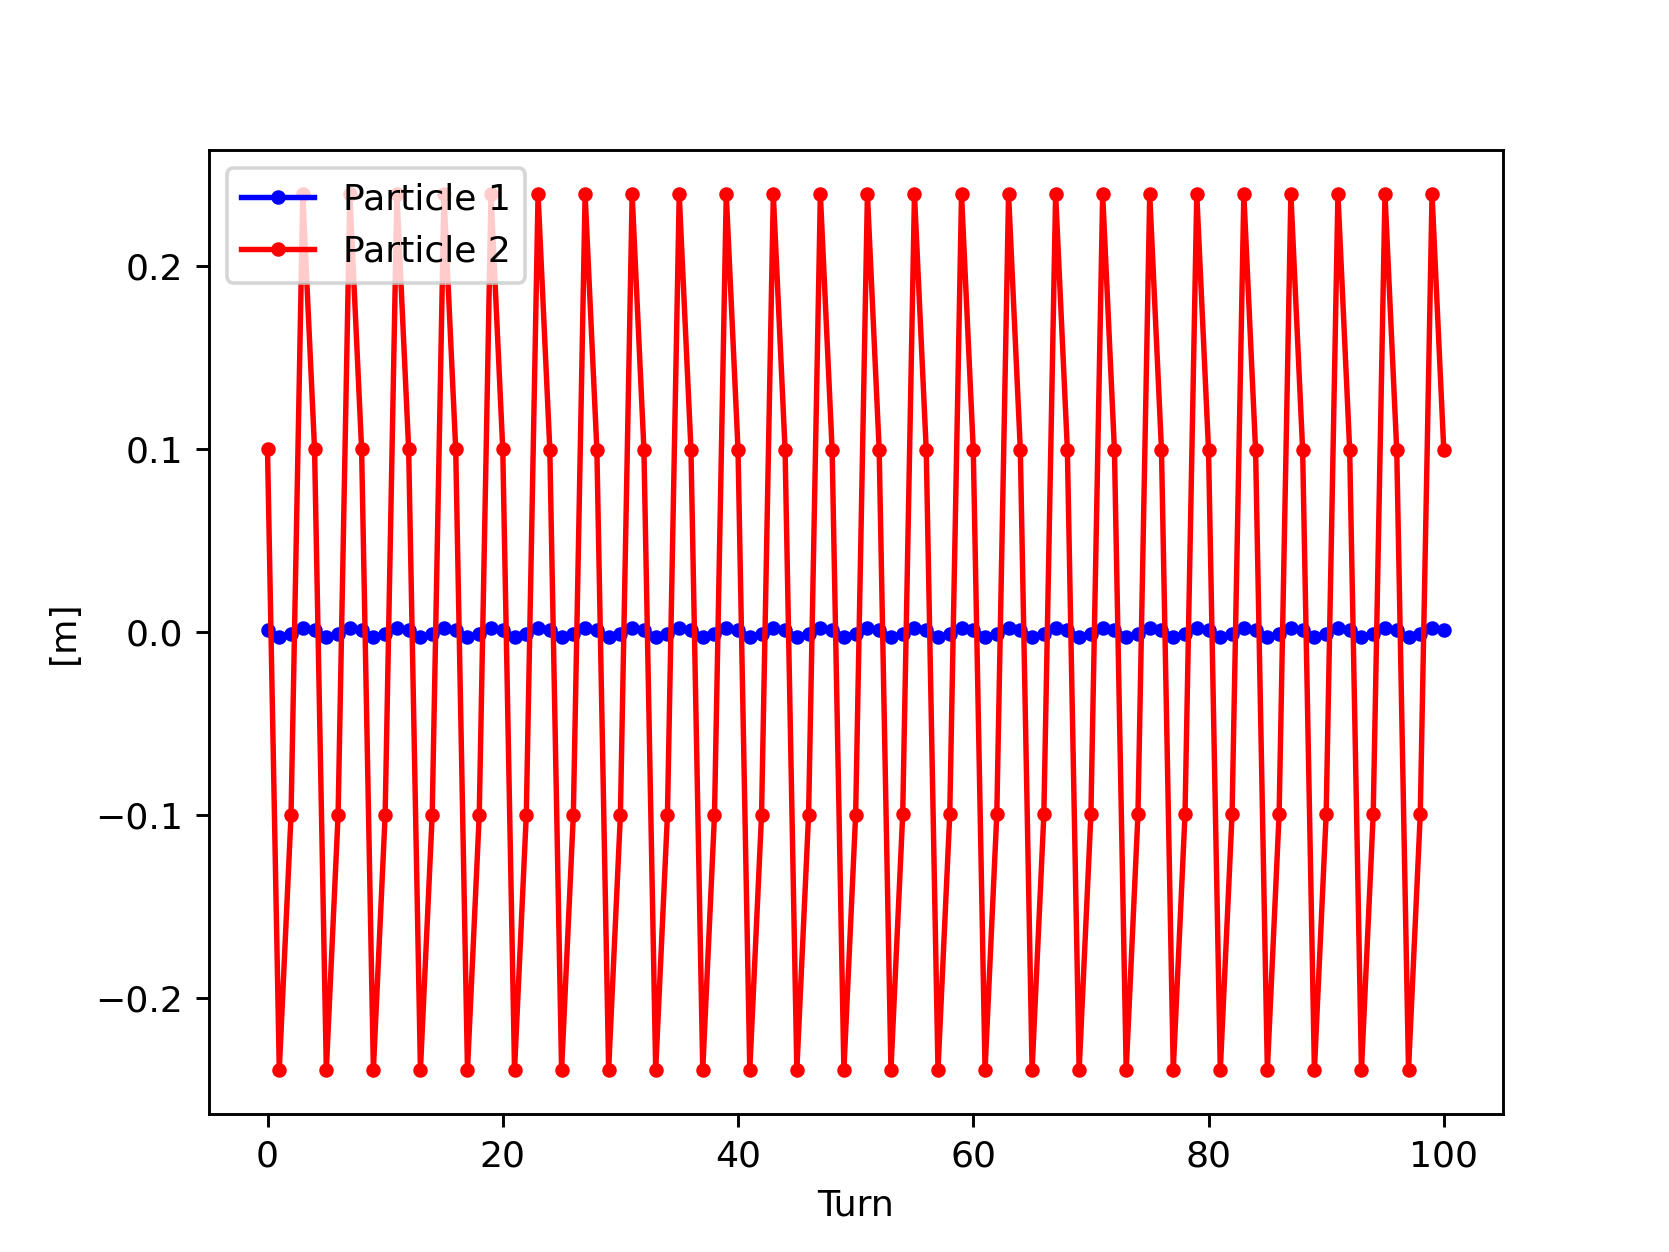

In [246]:
%matplotlib notebook
plt.plot(myParticle1['turn'],myParticle1['x'],'.-b', label='Particle 1')
plt.plot(myParticle2['turn'],myParticle2['x'],'.-r', label='Particle 2')
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');

<IPython.core.display.Javascript object>


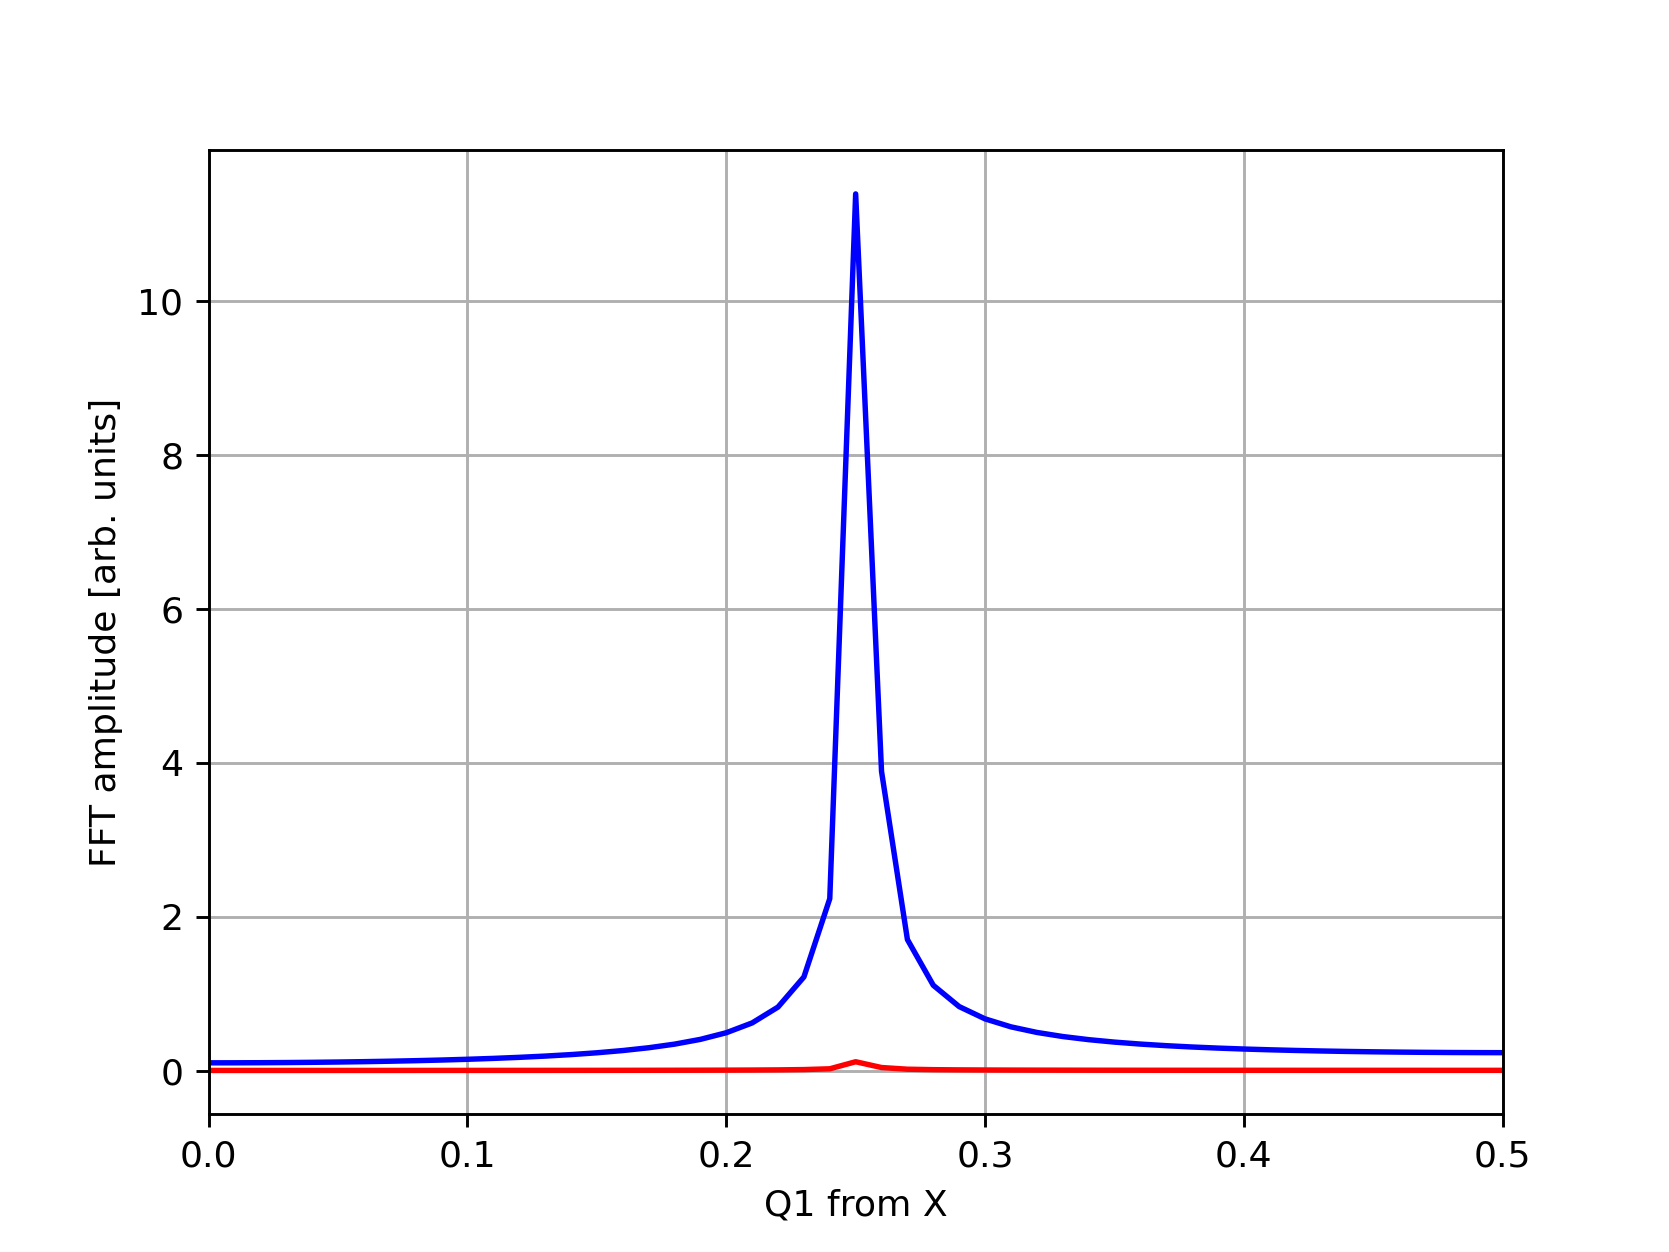

In [247]:
%matplotlib notebook
# The amplitude of the FFT of the particle amplitude oscilations gives as a mesure of the tune
# Just play with an FFT on 
plt.figure()
plt.plot(np.linspace(0,1,len(particle1['x'])), np.abs(np.fft.fft(particle1['x'])), 'r')
plt.plot(np.linspace(0,1,len(particle2['x'])), np.abs(np.fft.fft(particle2['x'])), 'b')
plt.xlabel('Q1 from X')
plt.ylabel('FFT amplitude [arb. units]');
plt.xlim(0,0.5)
plt.grid()

Answer: We obtain a similar plot as before but with larger amplitues.

# Track off-momentum

7. Repeat point 4 adding DELTAP=1e-2 to the track command. How does the phase space look now? Is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.

In [248]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine_off_energy', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.167801E-02 deltap:   1.000000E-02
orbit:   2.246270E-02  3.258240E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   1.734723E-17 deltap:   1.000000E-02
orbit:   2.246270E-02  3.258240E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100     0.002184585873    4.784676525e-05 
         2        100       0.1722725307      0.00366217545 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.009999999911 
               0.1                  0                  0     0.009999999911 
  -0.0008660042342    3.648792955e-05     -0.05480577385     0.009999999911

In [249]:
off_momentum_particle1=myMad.table['track.obs0001.p0001'].dframe()
off_momentum_particle2=myMad.table['track.obs0001.p0002'].dframe()

<IPython.core.display.Javascript object>


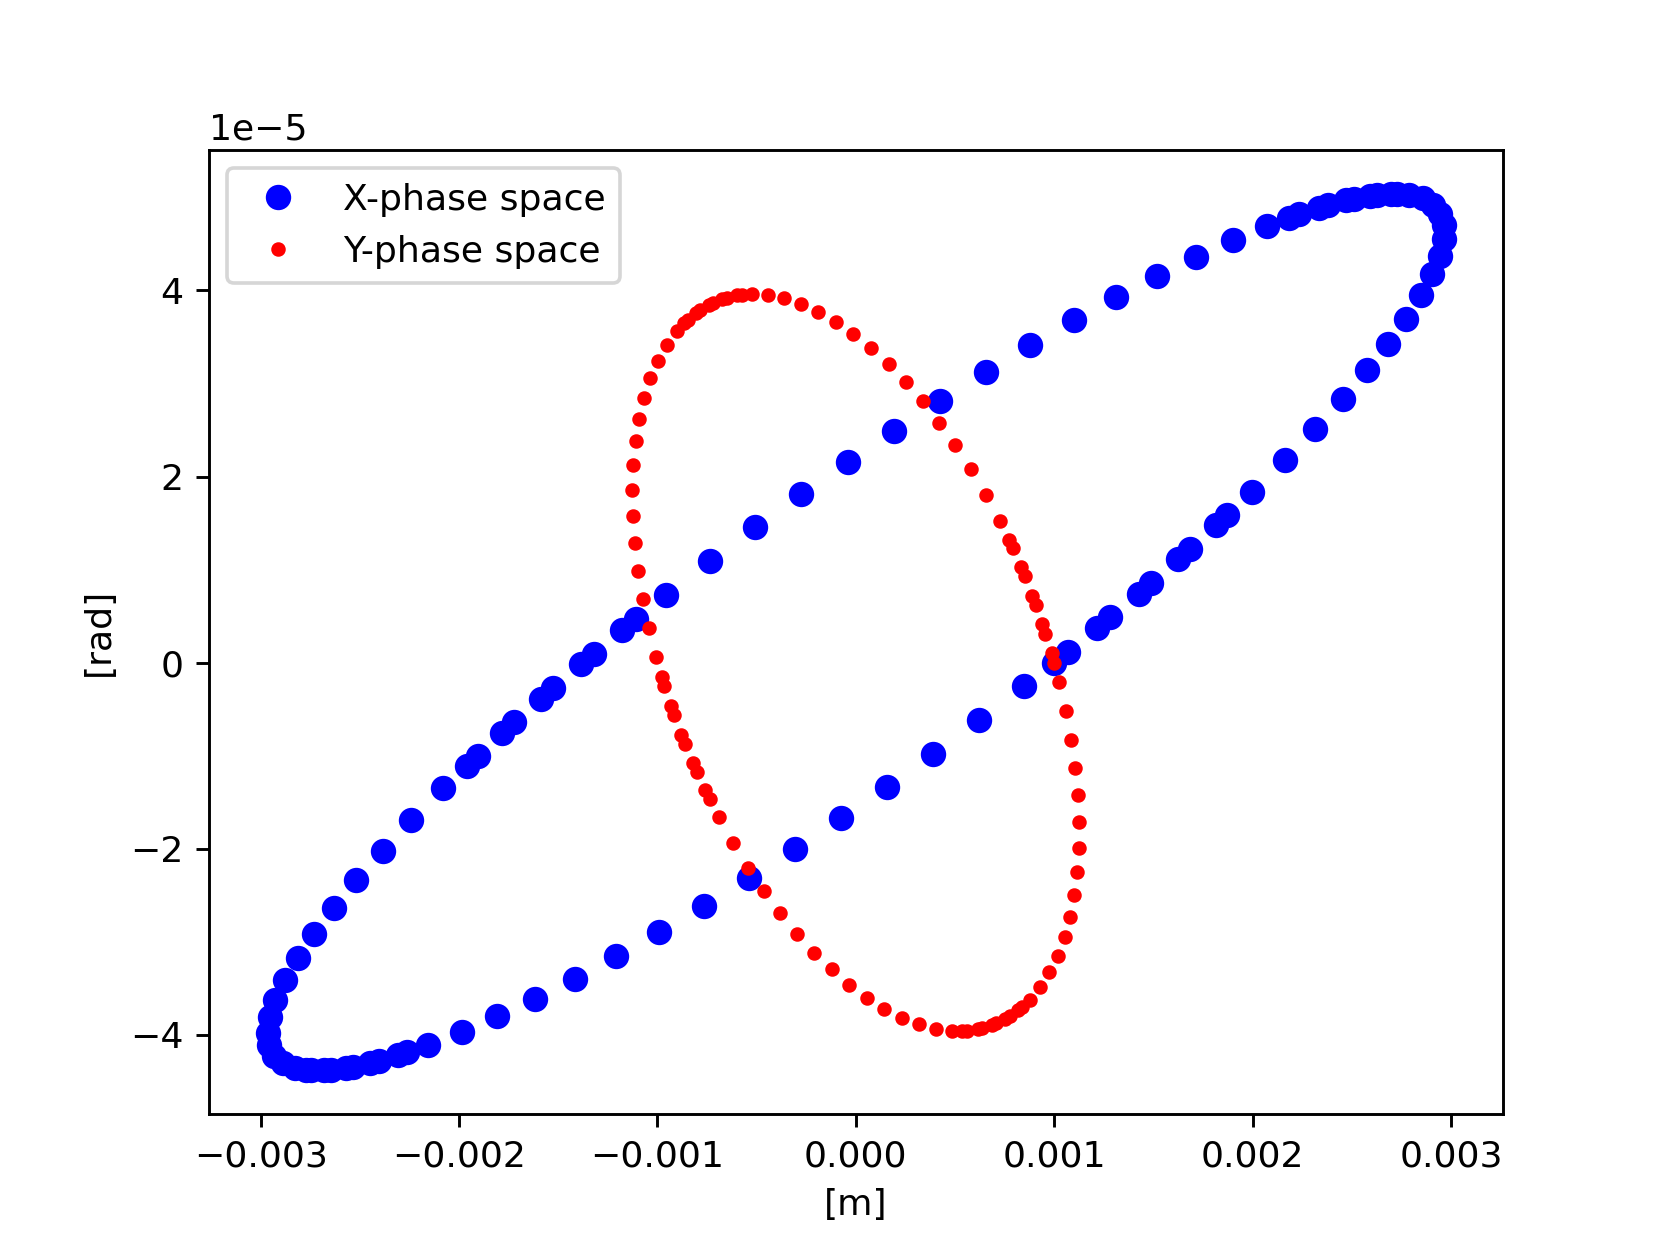

In [250]:
%matplotlib notebook
plt.plot(off_momentum_particle1['x'],off_momentum_particle1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_particle1['y'],off_momentum_particle1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

As we track off-momentum particles the tune is afected by the natural chromaticity of the FODO and it is not 0.25 anymore.

<IPython.core.display.Javascript object>


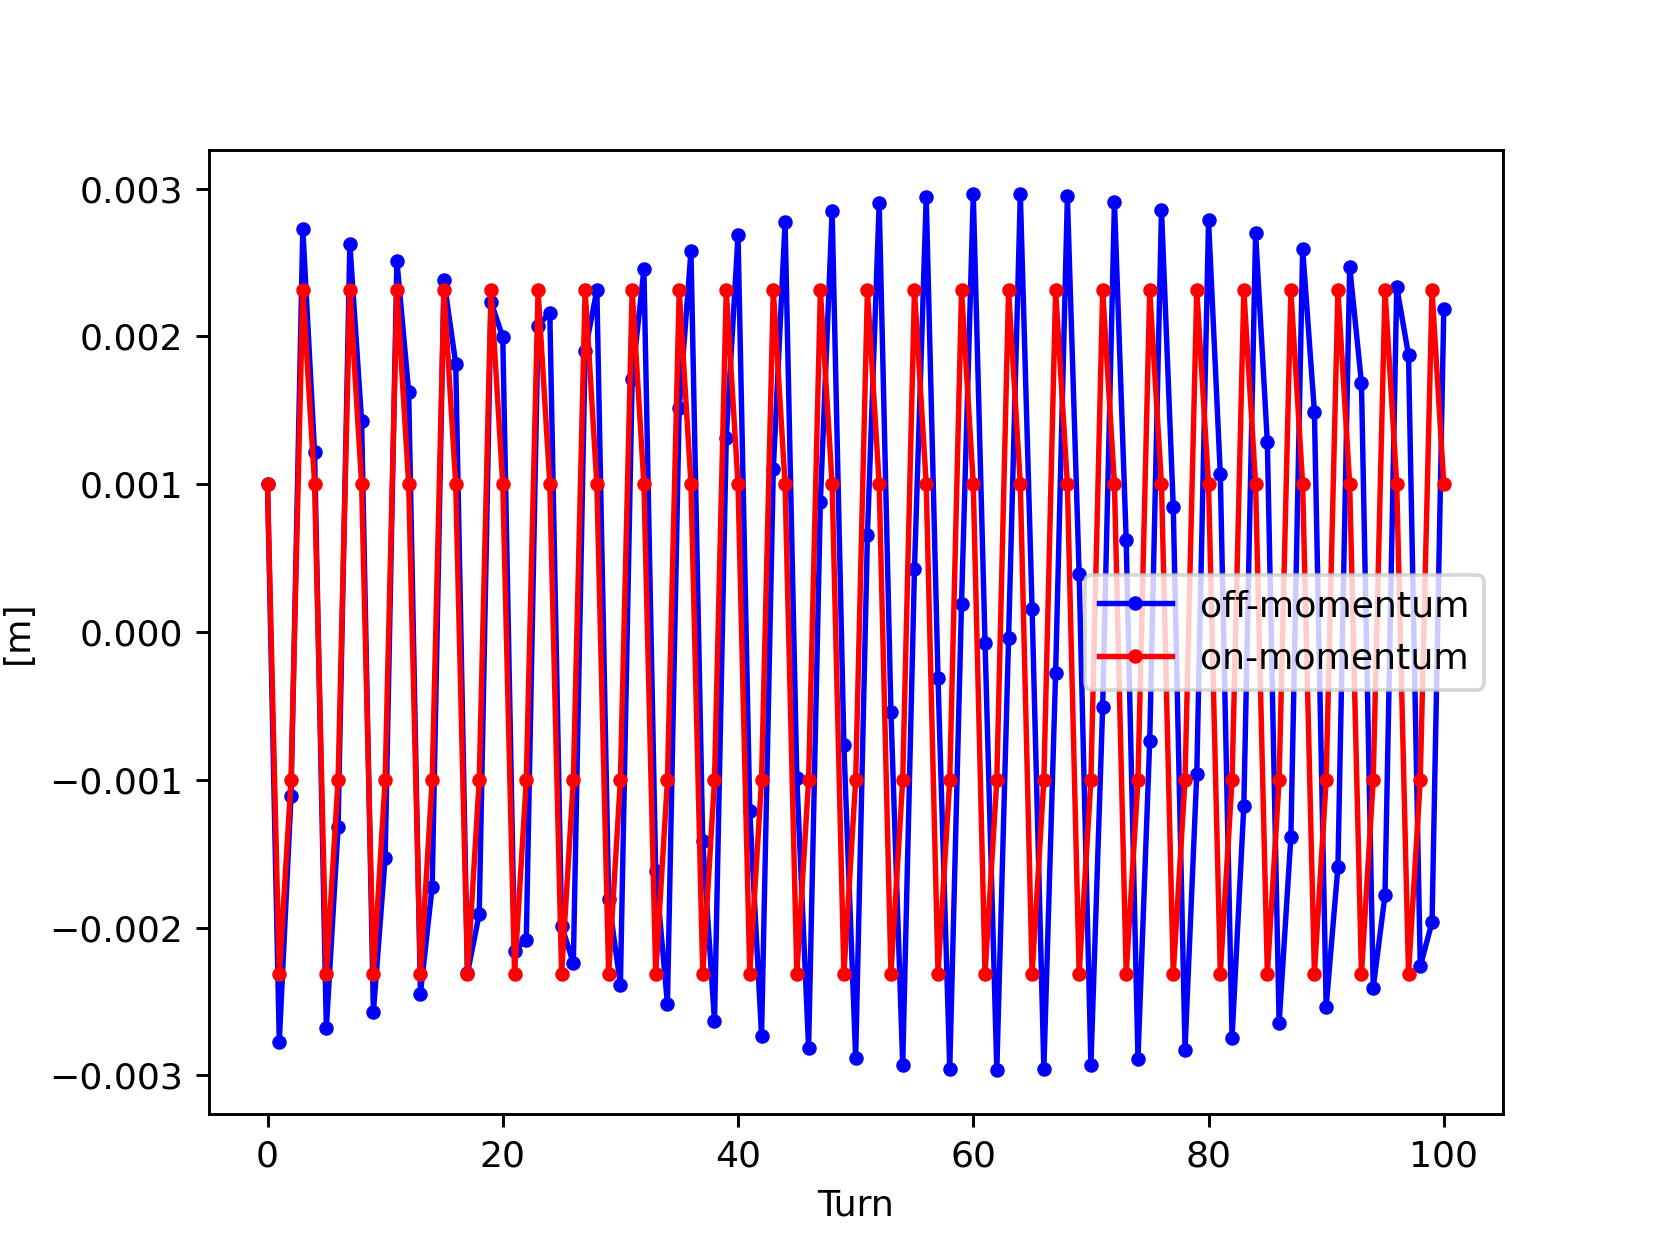

In [251]:
%matplotlib notebook
plt.plot(off_momentum_particle1['turn'],off_momentum_particle1['x'],'.-b', label='off-momentum')
plt.plot(particle1['turn'],particle1['x'],'.-r', label='on-momentum')
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');

<IPython.core.display.Javascript object>


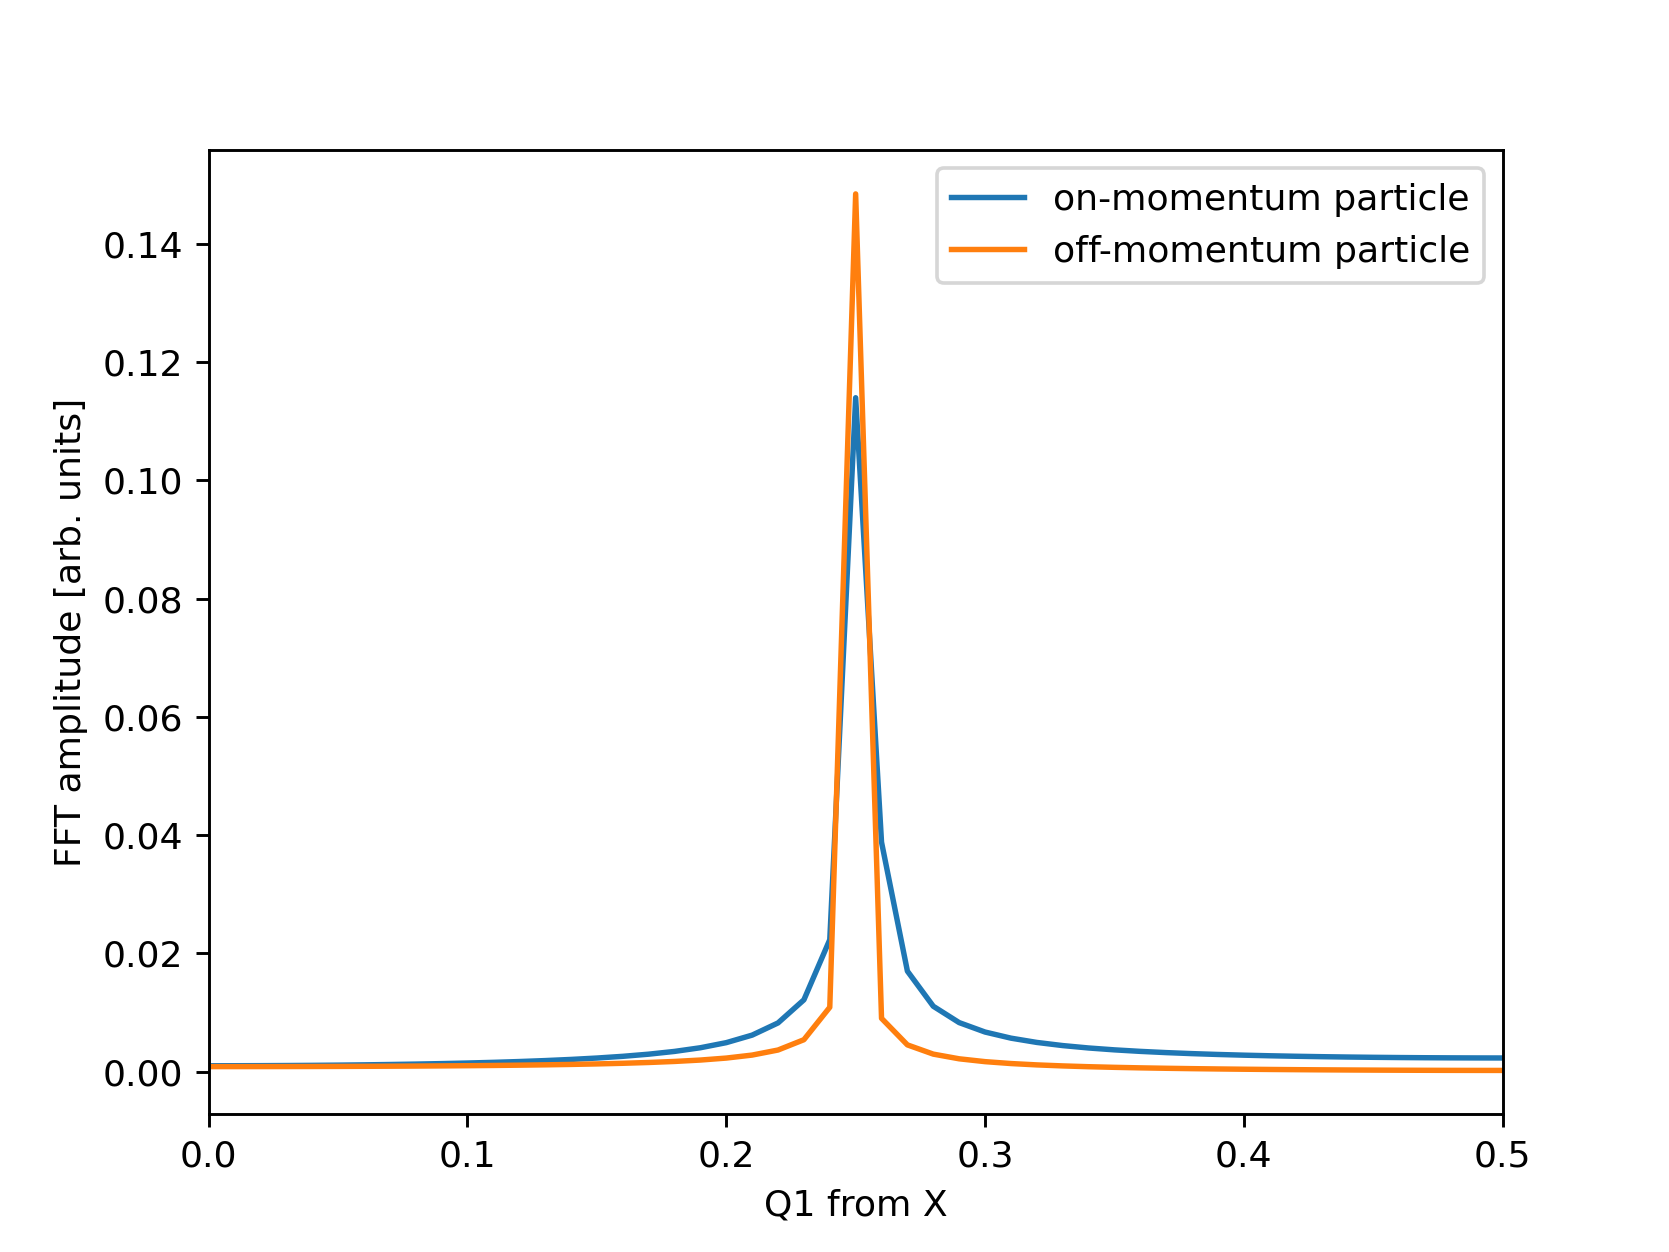

In [253]:
%matplotlib notebook
plt.plot(np.linspace(0,1,len(particle1['x'])), np.abs(np.fft.fft(particle1['x'])),label="on-momentum particle")
plt.plot(np.linspace(0,1,len(off_momentum_particle1['x'])), np.abs(np.fft.fft(off_momentum_particle1['x'])),label="off-momentum particle")
plt.xlim(0,.5)
plt.xlabel('Q1 from X')
plt.ylabel('FFT amplitude [arb. units]');
plt.legend()